In [1]:
from ift6758.data.acquisition import NHLGameData
from ift6758.data import NB_MAX_REGULAR_GAMES_PER_SEASON, NHL_GAME_URL, SeasonType


In [2]:
data_path_raw = './../ift6758/data/json_raw/'
nhl_games_data = NHLGameData(data_path_raw)

In [3]:
for year in range(2016,2021):
    nhl_games_data.fetch_season(year)

Loading from cache file ./../ift6758/data/json_raw/2016/2016-regular.pkl
Found 1230 regular games for season 2016-2017
Loading from cache file ./../ift6758/data/json_raw/2016/2016-playoff.pkl
Found 102 playoff games for season 2016-2017
Loading from cache file ./../ift6758/data/json_raw/2017/2017-regular.pkl
Found 1271 regular games for season 2017-2018
Loading from cache file ./../ift6758/data/json_raw/2017/2017-playoff.pkl
Found 105 playoff games for season 2017-2018
Loading from cache file ./../ift6758/data/json_raw/2018/2018-regular.pkl
Found 1271 regular games for season 2018-2019
Loading from cache file ./../ift6758/data/json_raw/2018/2018-playoff.pkl
Found 105 playoff games for season 2018-2019
Loading from cache file ./../ift6758/data/json_raw/2019/2019-regular.pkl
Found 1271 regular games for season 2019-2020
Loading from cache file ./../ift6758/data/json_raw/2019/2019-playoff.pkl
Found 105 playoff games for season 2019-2020
Loading from cache file ./../ift6758/data/json_raw/2

In [4]:
from ift6758.data.cleaning import DataCleaner


In [5]:
data_path_clean = './../ift6758/data/json_clean/'
data_cleaner = DataCleaner(data_raw=nhl_games_data, data_path_clean=data_path_clean)

In [6]:
for year in range(2016,2021):
    data_cleaner.clean_season(year)

In [7]:
from ift6758.features import FeatureEng

In [8]:
w = FeatureEng(data_path_clean)

In [9]:
w.TrainValSets(2016,2020)

,empty_net,is_goal,distance,angle
0,0,0,13.928388,21.037511
1,0,0,13.601471,72.897271
2,0,0,77.025970,-29.560354
3,0,0,58.940648,-14.743563
4,0,0,62.609903,26.565051
...,...,...,...,...
298129,0,0,26.419690,-60.524111
298130,0,0,40.496913,69.775141
298131,0,0,14.866069,42.273689
298132,0,0,11.401754,-37.874984


In [10]:
w.getTestSet(2020)

,game_id,time,event_type,period,team,coordinates,x,y,shooter,goalie,shot_type,empty_net,strength,opposite_team_side
0,2020020001,00:16,SHOT,1,Philadelphia Flyers,"{'x': -74.0, 'y': 29.0}",-74.0,29.0,Travis Konecny,Tristan Jarry,Wrist Shot,False,None,left
1,2020020001,00:34,SHOT,1,Pittsburgh Penguins,"{'x': 49.0, 'y': -25.0}",49.0,-25.0,Evan Rodrigues,Carter Hart,Wrist Shot,False,None,right
2,2020020001,01:05,SHOT,1,Philadelphia Flyers,"{'x': -52.0, 'y': -31.0}",-52.0,-31.0,Joel Farabee,Tristan Jarry,Backhand,False,None,left
3,2020020001,02:51,SHOT,1,Pittsburgh Penguins,"{'x': 43.0, 'y': 39.0}",43.0,39.0,Evan Rodrigues,Carter Hart,Snap Shot,False,None,right
4,2020020001,03:44,SHOT,1,Philadelphia Flyers,"{'x': -53.0, 'y': 8.0}",-53.0,8.0,Claude Giroux,Tristan Jarry,Slap Shot,False,None,left
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55459,2020030415,16:19,SHOT,3,Tampa Bay Lightning,"{'x': 57.0, 'y': 30.0}",57.0,30.0,Blake Coleman,Carey Price,Wrist Shot,False,None,right
55460,2020030415,17:13,SHOT,3,Tampa Bay Lightning,"{'x': 56.0, 'y': -31.0}",56.0,-31.0,Mikhail Sergachev,Carey Price,Backhand,False,None,right
55461,2020030415,19:01,SHOT,3,Montréal Canadiens,"{'x': -45.0, 'y': -14.0}",-45.0,-14.0,Tyler Toffoli,Andrei Vasilevskiy,Wrist Shot,False,None,left
55462,2020030415,19:10,SHOT,3,Montréal Canadiens,"{'x': -77.0, 'y': -3.0}",-77.0,-3.0,Cole Caufield,Andrei Vasilevskiy,Backhand,False,None,left


In [11]:
goals = w.TrainValSets.loc[w.TrainValSets['is_goal']==1]

In [12]:
shots = w.TrainValSets.loc[w.TrainValSets['is_goal']==0]

In [13]:
import seaborn as sns

In [14]:
print(goals)

        empty_net  is_goal   distance      angle
6               0        1  20.024984   2.862405
11              0        1   8.544004  20.556045
14              0        1  56.008928  -1.023030
15              0        1  31.304952 -63.434949
24              0        1  19.798990 -45.000000
...           ...      ...        ...        ...
298069          0        1  24.083189  41.633539
298076          0        1  11.180340 -10.304846
298112          0        1   5.656854 -45.000000
298120          0        1  31.890437  41.185925
298128          0        1   9.899495  45.000000

[28301 rows x 4 columns]


<Axes: xlabel='distance', ylabel='Count'>

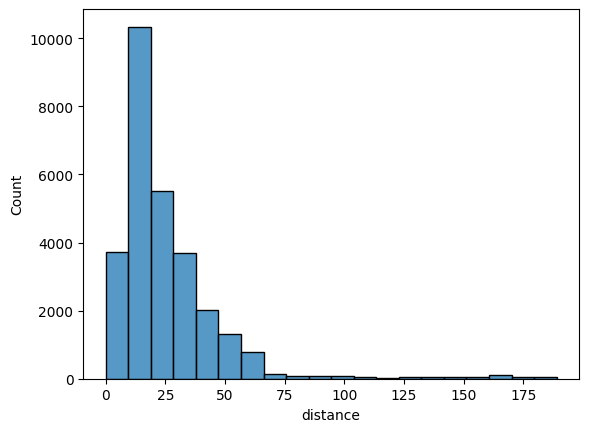

In [25]:
sns.histplot(data = goals, x = 'distance', bins = 20)

<Axes: xlabel='distance', ylabel='Count'>

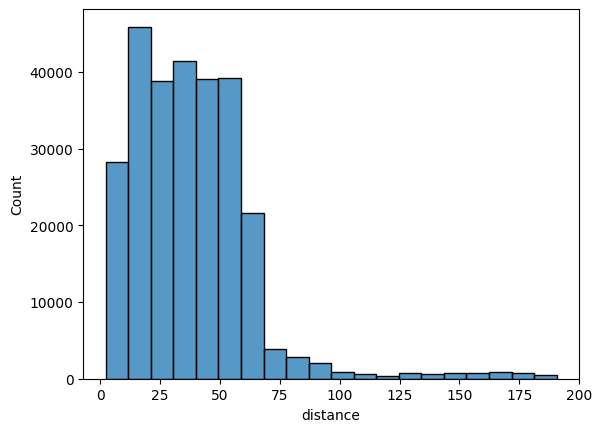

In [23]:
sns.histplot(data = shots, x = 'distance', bins = 20)

<Axes: xlabel='distance', ylabel='Count'>

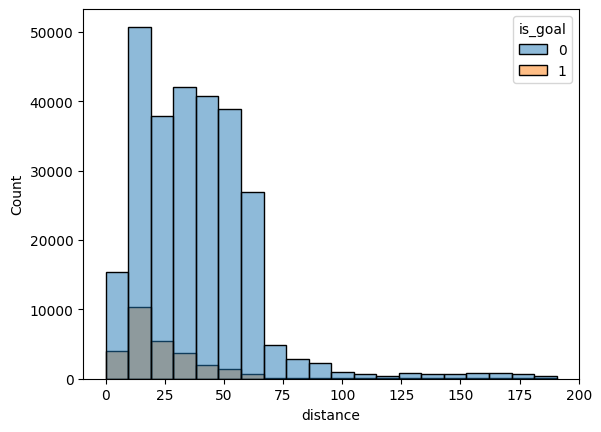

In [26]:
sns.histplot(data = w.TrainValSets, x = 'distance', bins = 20, hue = 'is_goal')

<Axes: xlabel='angle', ylabel='Count'>

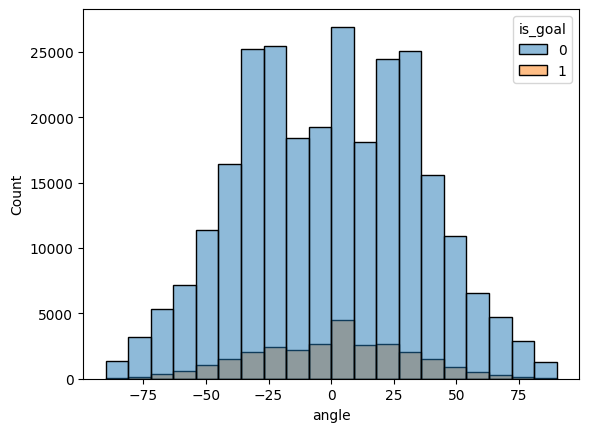

In [27]:
sns.histplot(data = w.TrainValSets, x = 'angle', bins = 20, hue = 'is_goal')

<Axes: xlabel='angle', ylabel='distance'>

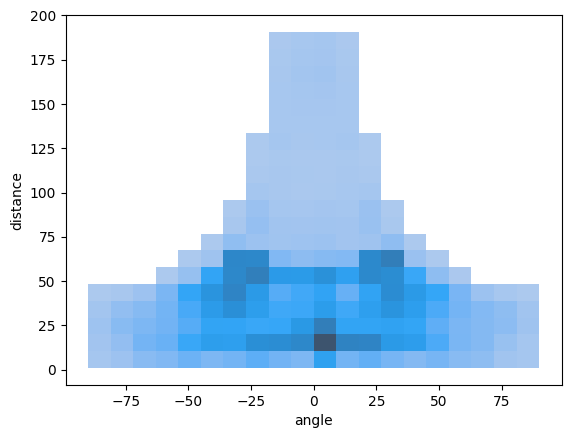

In [28]:
sns.histplot(data = w.TrainValSets, x = 'angle', y='distance', bins = 20)